# Customizing Colorbars

Las leyendas de los gráficos identifican etiquetas discretas de puntos discretos.
Para las etiquetas continuas basadas en el color de puntos, líneas o regiones, una barra de colores etiquetada puede ser una gran herramienta.
En Matplotlib, una barra de colores es un eje independiente que puede proporcionar una clave para el significado de los colores en un gráfico.

Comenzaremos configurando el cuaderno para trazar e importando las funciones que usaremos:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline
import numpy as np

Como hemos visto varias veces a lo largo de esta sección, la barra de colores más simple se puede crear con la función ``plt.colorbar``:

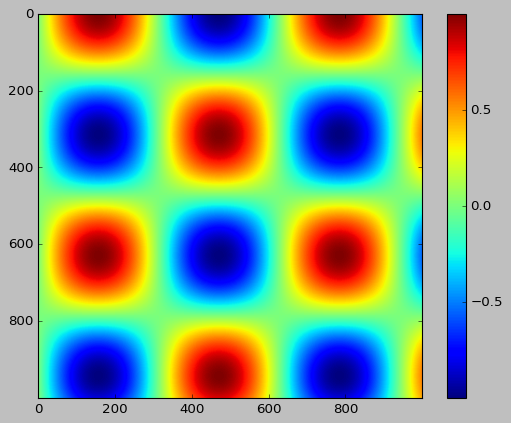

In [3]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

Ahora discutiremos algunas ideas para personalizar estas barras de colores y usarlas de manera efectiva en diversas situaciones.

## Customizing Colorbars

El mapa de colores se puede especificar utilizando el argumento ``cmap`` de la función de trazado que está creando la visualización:

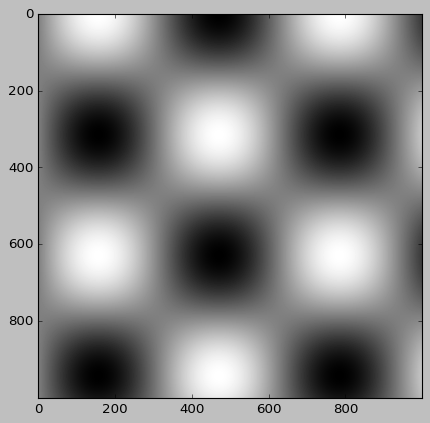

In [5]:
plt.imshow(I, cmap='gray');

Todos los mapas de colores disponibles están en el espacio de nombres ``plt.cm``; si usa la función de completar tabulaciones de IPython, obtendrá una lista completa de posibilidades integradas:
```
plt.cm.<TAB>
```
Pero poder elegir un mapa de colores es solo el primer paso: lo más importante es cómo *decidir* entre las posibilidades.
La elección resulta ser mucho más sutil de lo que podría esperar inicialmente.

In [ ]:
# plt.cm.

### Choosing the Colormap

Un tratamiento completo de la elección de color en la visualización está fuera del alcance de este libro, pero para una lectura entretenida sobre este tema y otros, consulte el artículo ["Diez reglas simples para mejores figuras"](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833).
La ​​documentación en línea de Matplotlib también tiene una [discusión interesante](http://Matplotlib.org/1.4.1/users/colormaps.html) sobre la elección de mapas de colores.

En términos generales, debe conocer tres categorías diferentes de mapas de colores:

- *Mapas de colores secuenciales*: están compuestos de una secuencia continua de colores (por ejemplo, ``binary`` o ``viridis``).
- *Mapas de colores divergentes*: estos suelen contener dos colores distintos, que muestran desviaciones positivas y negativas de una media (p. ej., ``RdBu`` o ``PuOr``).
- *Mapas de colores cualitativos*: estos mezclan colores sin una secuencia particular (p. ej., ``rainbow`` o ``jet``).

El mapa de colores ``jet``, que era el predeterminado en Matplotlib antes de la versión 2.0, es un ejemplo de un mapa de colores cualitativo.
Su condición de predeterminado fue bastante desafortunada, porque los mapas cualitativos suelen ser una mala elección para representar datos cuantitativos.
Entre los problemas está el hecho de que los mapas cualitativos normalmente no muestran ninguna progresión uniforme en el brillo a medida que aumenta la escala.

Podemos ver esto convirtiendo la barra de colores ``jet`` en blanco y negro:

In [6]:
from matplotlib.colors import LinearSegmentedColormap


def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convertir RGBA a luminancia de escala de grises percibida
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

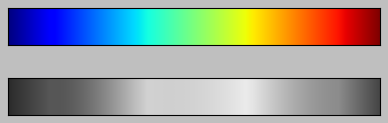

In [7]:
view_colormap('jet')

Observe las rayas brillantes en la imagen en escala de grises.
Incluso a todo color, este brillo desigual significa que la vista se verá atraída por ciertas partes del rango de colores, lo que potencialmente enfatizará partes no importantes del conjunto de datos.
Es mejor utilizar un mapa de colores como ``viridis`` (el predeterminado a partir de Matplotlib 2.0), que está construido específicamente para tener una variación de brillo uniforme en todo el rango.
Por lo tanto, no solo se adapta bien a nuestra percepción del color, sino que también se traducirá bien a la impresión en escala de grises:

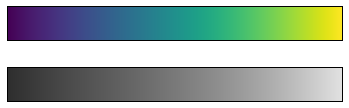

In [12]:
view_colormap('viridis')

Si prefieres los esquemas de arco iris, otra buena opción para datos continuos es el mapa de colores ``cubehelix``:

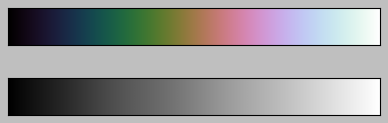

In [8]:
view_colormap('cubehelix')

Para otras situaciones, como mostrar desviaciones positivas y negativas de una media, las barras de colores de dos colores como ``RdBu`` (*Rojo-Azul*) pueden resultar útiles. Sin embargo, como puede ver en la siguiente figura, es importante tener en cuenta que la información positiva-negativa se perderá al traducir a escala de grises.

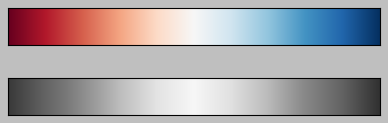

In [9]:
view_colormap('RdBu')

Veremos ejemplos de uso de algunos de estos mapas de colores a medida que avancemos.

Hay una gran cantidad de mapas de colores disponibles en Matplotlib; para ver una lista de ellos, puede utilizar IPython para explorar el submódulo ``plt.cm``. Para un enfoque más basado en principios sobre los colores en Python, puede consultar las herramientas y la documentación dentro de la biblioteca Seaborn.

### Color limits and extensions

Matplotlib permite una amplia gama de personalización de la barra de colores.
La barra de colores en sí es simplemente una instancia de ``plt.Axes``, por lo que todos los trucos de formato de ejes y marcas que hemos aprendido son aplicables.
La barra de colores tiene una flexibilidad interesante: por ejemplo, podemos reducir los límites de color e indicar los valores fuera de los límites con una flecha triangular en la parte superior e inferior configurando la propiedad ``extend``.
Esto puede resultar útil, por ejemplo, si se muestra una imagen que está sujeta a ruido:

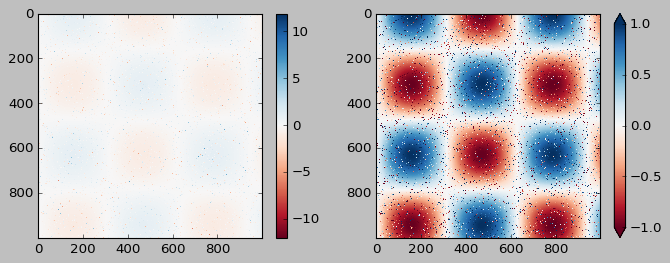

In [12]:
# hacer ruido en el 1% de los píxeles de la imagen
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

Observe que en el panel izquierdo, los límites de color predeterminados responden a los píxeles ruidosos y el rango del ruido elimina por completo el patrón que nos interesa.
En el panel derecho, configuramos manualmente los límites de color y agregamos extensiones para indicar los valores que están por encima o por debajo de esos límites.
El resultado es una visualización mucho más útil de nuestros datos.

### Discrete Color Bars

Los mapas de colores son continuos de forma predeterminada, pero a veces es posible que desees representar valores discretos.
La forma más sencilla de hacerlo es usar la función ``plt.get_cmap()`` y pasar el nombre de un mapa de colores adecuado junto con la cantidad de contenedores deseados:

In [13]:
I.max()

np.float64(11.876589375657687)

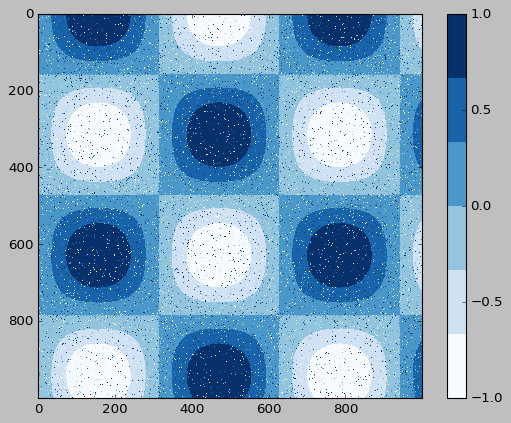

In [15]:
plt.imshow(I, cmap=plt.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

La versión discreta de un mapa de colores se puede utilizar como cualquier otro mapa de colores.

## Example: Handwritten Digits

Para ver un ejemplo de dónde esto puede ser útil, veamos una visualización interesante de algunos datos de dígitos escritos a mano.
Estos datos están incluidos en Scikit-Learn y consisten en casi 2000 miniaturas de $8 \times 8$ que muestran varios dígitos escritos a mano.

Por ahora, comencemos descargando los datos de dígitos y visualizando varias de las imágenes de ejemplo con ``plt.imshow()``:

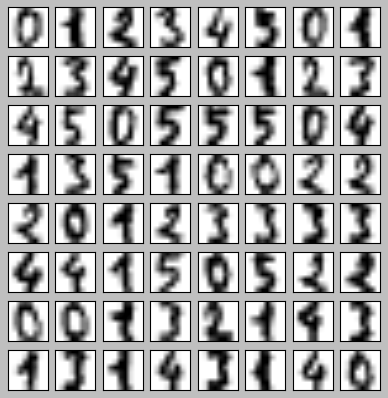

In [16]:
# cargar imágenes de los dígitos del 0 al 5 y visualizar varias de ellas
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

Como cada dígito se define por el tono de sus 64 píxeles, podemos considerar cada dígito como un punto que se encuentra en un espacio de 64 dimensiones: cada dimensión representa el brillo de un píxel.
Pero visualizar relaciones en espacios de tantas dimensiones puede ser extremadamente difícil.
Una forma de abordar esto es utilizar una técnica de *reducción de dimensionalidad*, como el aprendizaje de variedades, para reducir la dimensionalidad de los datos manteniendo las relaciones de interés.

In [ ]:
# Proyecta los dígitos en 2 dimensiones usando IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

Usaremos nuestro mapa de colores discreto para ver los resultados, configurando los ``ticks`` y ``clim`` para mejorar la estética de la barra de colores resultante:

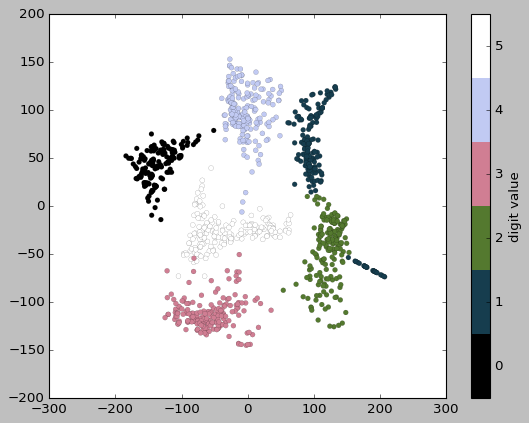

In [20]:
# plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

La proyección también nos brinda algunas ideas interesantes sobre las relaciones dentro del conjunto de datos: por ejemplo, los rangos de 5 y 3 casi se superponen en esta proyección, lo que indica que algunos cincos y treses escritos a mano son difíciles de distinguir y, por lo tanto, es más probable que se confundan con un algoritmo de clasificación automático.
Otros valores, como 0 y 1, están más distantes entre sí y, por lo tanto, es mucho menos probable que se confundan.
Esta observación concuerda con nuestra intuición, porque 5 y 3 se parecen mucho más que 0 y 1.